# Forest Cover Type Prediction

This notebook builds a machine learning model to predict the type of forest cover using environmental data for 30m x 30m patches of land.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

## 2. Load and Explore the Dataset

In [2]:
df = pd.read_csv("train.csv")
df.drop('Id', axis=1, inplace=True)

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [21]:
print("Missing values: ", df.isnull().sum().sum())


Missing values:  0


In [5]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Visualize Data

### Distribution of Forest Cover Types

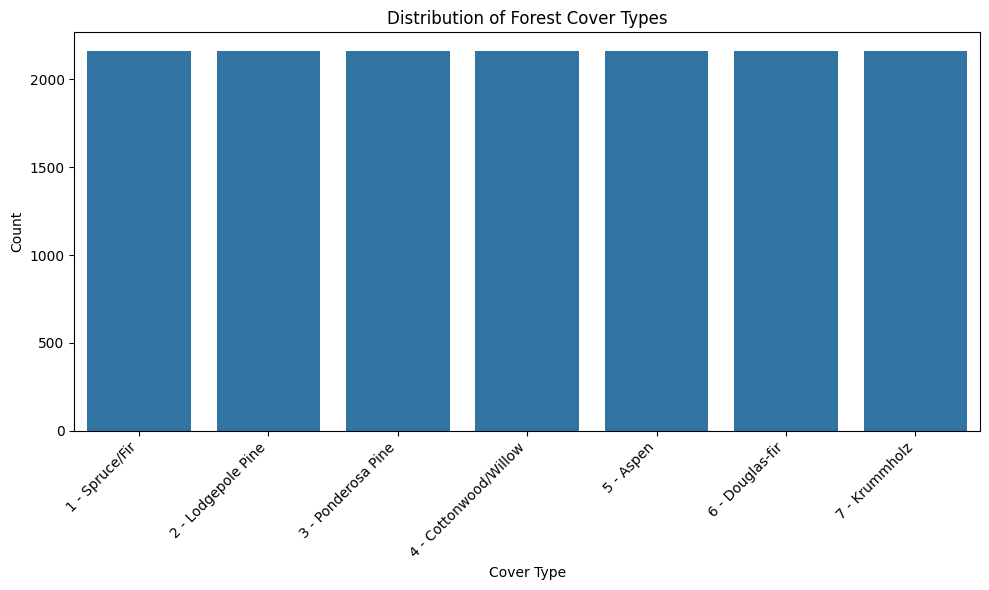

In [6]:
plt.figure(figsize=(10, 6))
cover_type_counts = df['Cover_Type'].value_counts().sort_index()
sns.barplot(x=cover_type_counts.index, y=cover_type_counts.values)
plt.title('Distribution of Forest Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')


cover_types = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}

plt.xticks(range(7), [f"{i+1} - {cover_types[i+1]}" for i in range(7)], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Checks how Elevation relates to Cover Type

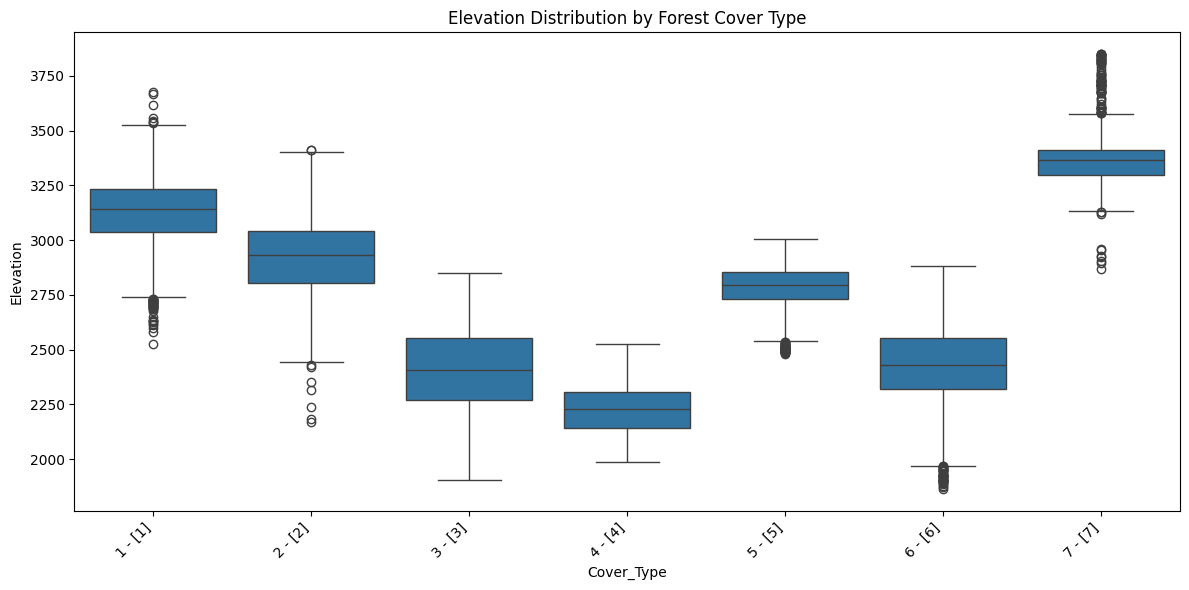

In [7]:
# Visualize how Elevation relates to Cover Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation Distribution by Forest Cover Type')
plt.xticks(range(7), [f"{i+1} - {[i+1]}" for i in range(7)], rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Check distribution of wilderness areas per cover type

<Figure size 1200x600 with 0 Axes>

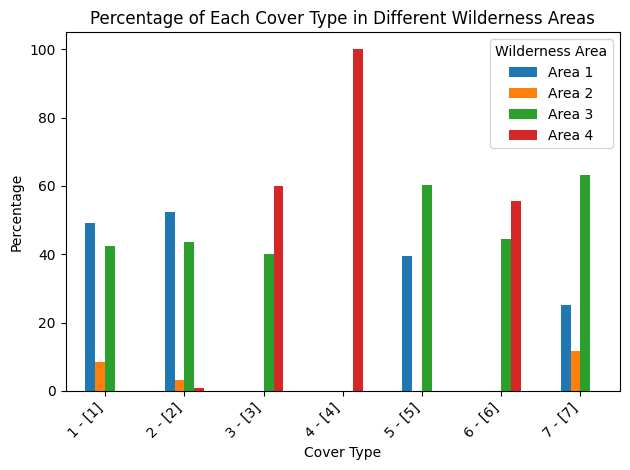

In [ ]:
wilderness_columns = [col for col in df.columns if col.startswith('Wilderness_Area')]
wilderness_dist = pd.DataFrame()

for i, col in enumerate(wilderness_columns):
    temp = df.groupby('Cover_Type')[col].mean() * 100
    wilderness_dist[f'Area {i+1}'] = temp

plt.figure(figsize=(12, 6))
wilderness_dist.plot(kind='bar')
plt.title('Percentage of Each Cover Type in Different Wilderness Areas')
plt.xlabel('Cover Type')
plt.ylabel('Percentage')
plt.xticks(range(7), [f"{i+1} - {[i+1]}" for i in range(7)], rotation=45, ha='right')
plt.legend(title='Wilderness Area')
plt.tight_layout()
plt.show()

## Data Preprocessing

In [18]:
# Splitting features and target
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Save the Best Model

In [16]:
joblib.dump(rf, "forest_cover_model.pkl")

['forest_cover_model.pkl']

## Visualize correlations between numerical features

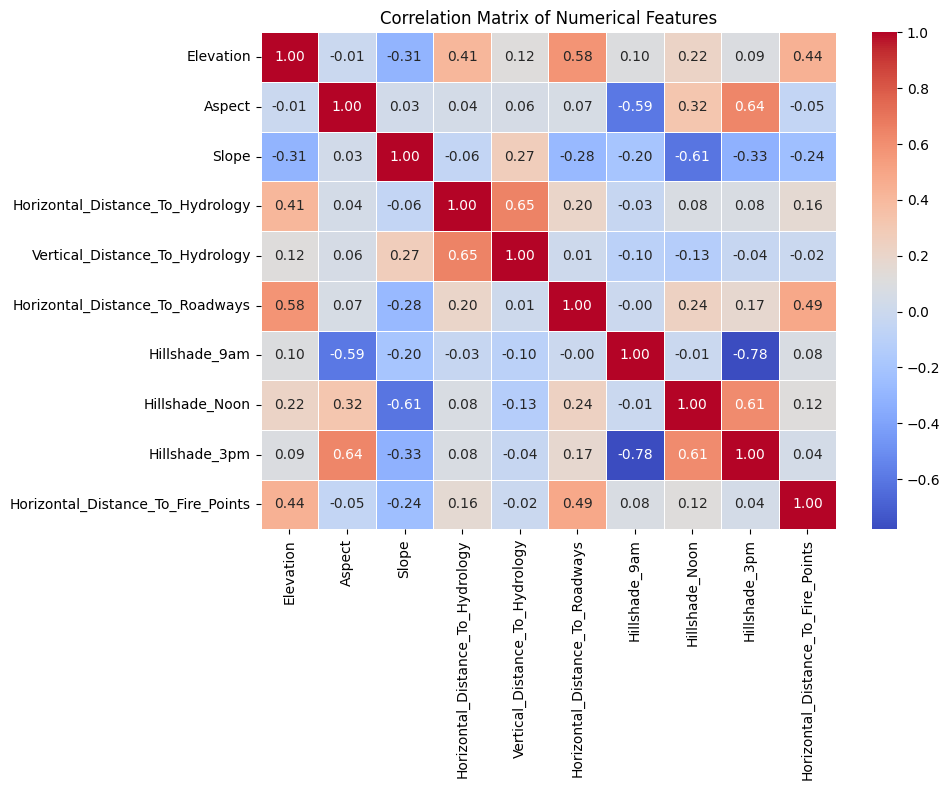

In [ ]:
binary_cols = [col for col in X.columns if col.startswith('Wilderness_Area') or col.startswith('Soil_Type')]
numerical_cols = [col for col in X.columns if col not in binary_cols]

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Model Training and Tuning

In [ ]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8723544973544973

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.78      0.79       421
           2       0.83      0.72      0.77       438
           3       0.83      0.83      0.83       428
           4       0.93      0.98      0.96       449
           5       0.89      0.96      0.92       416
           6       0.86      0.86      0.86       432
           7       0.95      0.97      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



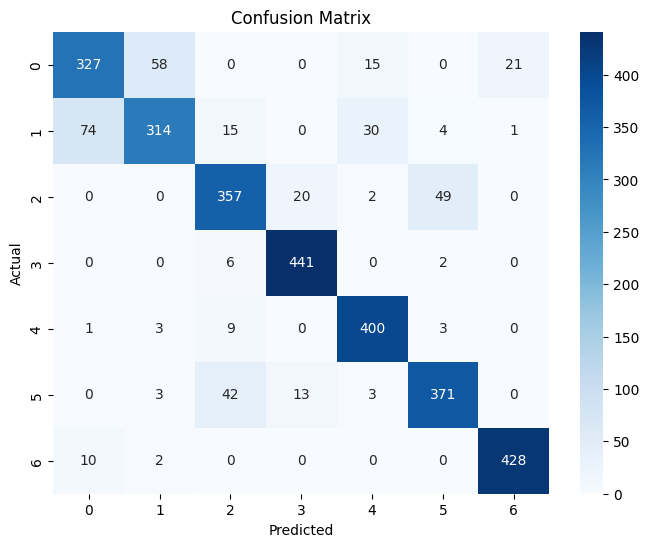

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()